In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from sample_data import sample_data

In [2]:
import sklearn.linear_model
import sklearn.model_selection

# Regression

### Import Data

In [3]:
def display_xy_plots(X, y):
    n_features = X.shape[1]
    n_cols = 2 if n_features > 1 else 1
    n_rows = n_features // 2
    print(f"Displaying {n_rows} rows and {n_cols} columns")
    
    fig, axs = plt.subplots(n_rows, n_cols)
    selected_feature = 0
    if n_rows == 1:
        for i in range(n_cols):
                axs[i].scatter(X[:, selected_feature], y)
                selected_feature += 1

    else: 
        for i in range(n_rows):
            for j in range(n_cols):
                axs[i][j].scatter(X[:, selected_feature], y)
                selected_feature += 1
    plt.show()

Displaying 3 rows and 2 columns


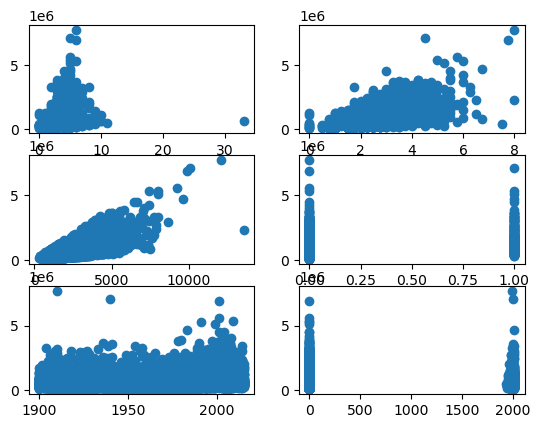

In [4]:
X, y = sample_data.kc_house_data()
y = y.reshape(-1)
display_xy_plots(X, y)

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, shuffle=True)

### Models

In [6]:
def test_linear_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    score = model.score(X_test, y_test)
    return score

#     fig, axs = plt.subplots(1, 2)
#     axs[0].scatter(X_test[:, 1], y_test, c='grey')
#     axs[0].scatter(X_test[:, 1], y_preds)
#     axs[1].scatter(X_test[:, 2], y_test, c='grey')
#     axs[1].scatter(X_test[:, 2], y_preds)
    
    plt.show()

In [13]:
models = [
    sklearn.linear_model.LinearRegression(),
    sklearn.linear_model.Ridge(alpha=0.5),
    sklearn.linear_model.Lasso(alpha=0.5),
    sklearn.linear_model.LassoLars(alpha=0.5),
    sklearn.svm.SVR(kernel='rbf'),
    sklearn.svm.SVR(kernel='linear'),
    sklearn.svm.SVR(kernel='poly')
]

scores = []

for model in models:
    score = test_linear_model(model, X_train, y_train, X_test, y_test)
    scores.append(score)

[0.5403058440998761, 0.5402805549485723, 0.5403058552243921, 0.5403058555311462, -0.04568719905868823, 0.48110366040847885, 0.061456859400834785]


<BarContainer object of 7 artists>

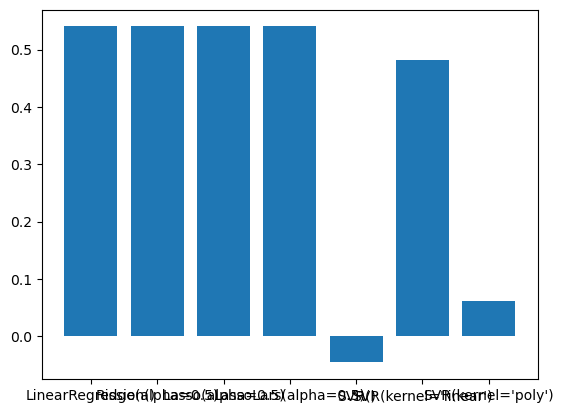

In [14]:
print(scores)
plt.bar([str(model) for model in models], scores, width=0.8)